# CLUSTERING DATA BUKU MENGGUNAKAN ALGORITMA K-MEANS
## Kelompok 3
Project Akhir Text Mining (C)
1. Hanif Darmawan (215150207111013)
2. Muhammad Rizqon Maulana (215150201111022)
3. Rakha Hanif Maheswara (215150201111003)
4. Cannino Alby Darmawan (215150200111018)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_json('data_tm.json')
df.head()

,title,url,publisher,cited,year,quartile
0,Genetic Diversity of Gorontalo Local Cattle Ba...,https://www.scopus.com/record/display.uri?eid=...,Advances in Animal and Veterinary Sciences,0,2023,Q3 Journal
1,Consumers’ Preference and Future Consideration...,https://www.scopus.com/record/display.uri?eid=...,Agris On-line Papers in Economics and Informatics,0,2023,Q2 Journal
2,A meta-analysis of the effects of clay mineral...,https://www.scopus.com/record/display.uri?eid=...,Poultry Science,7,2023,Q1 Journal
3,Identification and Analysis of Geotourism Pote...,https://www.scopus.com/record/display.uri?eid=...,AIP Conference Proceedings,1,2023,Q4 Journal
4,Epipsammic Diatom Cocconesis sp. as New Bioero...,https://www.scopus.com/record/display.uri?eid=...,Jurnal Ilmiah Perikanan dan Kelautan,0,2023,Q4 Journal


In [ ]:
print(len(df['title']))

df = df.dropna()
print(len(df['title']))

df = df.drop_duplicates()
print(len(df['title']))

11456
11456
7389


### Preprocessing

In [ ]:
import string
import re
import nltk
import numpy as np
import pandas as pd
import math
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
stemmer_en = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocessing(text):
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = text.lower()
    return text

def tokenize_and_stem(text):
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [stemmer_en.stem(token) for token in tokens if token not in stop_words]
    return tokens

def find_unique(tokens):
    return list(set(tokens))

In [ ]:
all_preprocessed = []

for data_title in df['title'].head(2000):
    print(data_title, '\n')
    preprocessed_data = preprocessing(data_title)
    tokenized_data = tokenize_and_stem(preprocessed_data)
    all_preprocessed.append(tokenized_data)
    print(tokenized_data, '\n')

Output streaming akan dipotong hingga 5000 baris terakhir.
Bayesian spatial-temporal autologistic regression model on dengue hemorrhagic fever in East Java, Indonesia 

['bayesian', 'spatial', 'tempor', 'autologist', 'regress', 'model', 'dengu', 'hemorrhag', 'fever', 'east', 'java', 'indonesia'] 

The use of satellite remote sensing data and geographic information systems on critical land analysis 

['use', 'satellit', 'remot', 'sens', 'data', 'geograph', 'inform', 'system', 'critic', 'land', 'analysi'] 

The effects of Eucheuma cottonii on signaling pathway inducing mucin synthesis in rat lungs chronically exposed to particulate matter 10 (PM 

['effect', 'eucheuma', 'cottonii', 'signal', 'pathway', 'induc', 'mucin', 'synthesi', 'rat', 'lung', 'chronic', 'expos', 'particul', 'matter', 'pm'] 

The impact of different types of permeable pavement utilization on air temperature above the pavement 

['impact', 'differ', 'type', 'permeabl', 'pavement', 'util', 'air', 'temperatur', 'pavement

### **Hitung TF-IDF**

In [ ]:
def printTabel(h, s, v):
  print(pd.DataFrame(v, columns=h, index=s),'\n')

def rawTermFreq(docs):
  text = list(set().union(*docs))
  header = ['D{}'.format(i + 1) for i in range(len(docs))]
  header.append('df')
  t = len(text)
  h = len(header)
  value = np.zeros((t, h))
  for i in range(t):
      count = 0
      for j in range(h):
          if j == h - 1:
              value[i][j] = count
          else:
              value[i][j] = docs[j].count(text[i])
              if value[i][j] != 0:
                  count += 1
  return value, header, text

def logFreq(t, h, text):
  for i in range(t):
    for j in range(h):
      if (j == h-1):
        value[i][j] = math.log((h-1)/value[i][j], 10)
      else:
        if (value[i][j] != 0):
          value[i][j] = 1+math.log(value[i][j], 10)
  return value

def idf(value):
  value[:, :-1] *= value[:, -1][:, np.newaxis]
  return value

value, header, text = rawTermFreq(all_preprocessed)
print(pd.DataFrame(value, columns=header, index=text), '\n')
value = logFreq(len(text), len(header), value)
print(pd.DataFrame(value, columns=header, index=text), '\n')
header[-1] = 'idf'
value = idf(value)
print(pd.DataFrame(value, columns=header, index=text), '\n')

           D1   D2   D3   D4   D5   D6   D7   D8   D9  D10  ...  D1992  D1993  \
signific  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
rotor     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
callu     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
summari   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
knapsack  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
king      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
mollusk   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
micruru   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
accid     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
transact  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

          D1994  D1995  D19

### **Hitung Normalisasi**

In [ ]:
def norm(value):
  for i in range(len(value[0])-1):
    x = np.sum(value[:, i]**2)
    if x != 0:  # Hindari pembagian dengan nol
      value[:, i] = value[:, i] / np.sqrt(x)
    else:
      value[:, i] = 0
  return value

tesNorm = norm(value.copy())
normTrans = tesNorm.transpose()
print(pd.DataFrame(tesNorm, columns=header, index=text), '\n')

           D1   D2   D3   D4   D5   D6   D7   D8   D9  D10  ...  D1992  D1993  \
signific  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
rotor     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
callu     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
summari   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
knapsack  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
king      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
mollusk   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
micruru   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
accid     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
transact  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

          D1994  D1995  D19

### **Clustering Title**

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

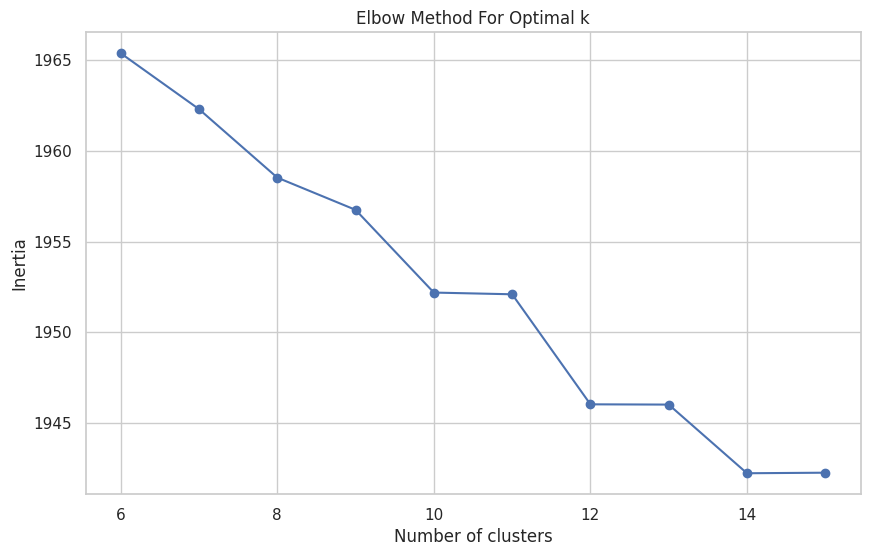

In [ ]:
# Use the Elbow method to find the optimal number of clusters
inertia = []
for i in tqdm(range(6, 16)):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normTrans[:-1])
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(6, 16), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import silhouette_score

def k_means_clustering(tfidf_matrix, k=4, max_iters=100):
    np.random.seed(42)
    centroids = tfidf_matrix[np.random.choice(tfidf_matrix.shape[0], k, replace=False)]

    for _ in range(max_iters):
        distances = cosine_distances(tfidf_matrix, centroids)

        # Tentukan keanggotaan cluster untuk setiap dokumen
        clusters = np.argmin(distances, axis=1)

        # Simpan posisi centroid sebelumnya
        old_centroids = centroids.copy()

        # Hitung ulang centroid berdasarkan rata-rata dokumen dalam cluster
        for i in range(k):
            cluster_docs = tfidf_matrix[clusters == i]
            if len(cluster_docs) > 0:
                centroids[i] = np.mean(cluster_docs, axis=0)

        # Cek apakah keanggotaan cluster tidak berubah
        if np.array_equal(old_centroids, centroids):
            print(f'Converged after {_ + 1} iterations.')
            break

    # Hitung Silhouette Score
    silhouette_avg = silhouette_score(tfidf_matrix, clusters)
    print("Silhouette Score:", silhouette_avg)

    return clusters, centroids

result_clusters, result_centroids = k_means_clustering(normTrans[:-1], k=12, max_iters=100)

# Tampilkan hasil
print(result_clusters)

Converged after 15 iterations.
Silhouette Score: 0.0037735493470586697
[ 4 10  5 ...  0  8  2]


In [ ]:
print(result_clusters)

[2 0 2 ... 1 0 1]


### **Clustering 4 fitur**

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns

df = pd.read_json('data_tm.json')
df = df.head(2000)

# Melakukan encoding pada kolom 'quartile' karena kolom tersebut masih berbentuk kategorikal
quartile_mapping = {'no-Q Journal':0,'Q1 Journal': 1, 'Q2 Journal': 2, 'Q3 Journal': 3, 'Q4 Journal': 4}
df['quartile_encoded'] = df['quartile'].map(quartile_mapping)
df['title_cluster'] = result_clusters


# Pemilihan feature yang digunakan untuk clustering
features = df[['title_cluster','cited', 'year', 'quartile_encoded']]

# Melakukan normalisasi fitur
normalized_features = (features - features.mean()) / features.std()

Converged after 19 iterations.
Silhouette Score: 0.3124841146884554
                                               title  \
0  Genetic Diversity of Gorontalo Local Cattle Ba...   
1  Consumers’ Preference and Future Consideration...   
2  A meta-analysis of the effects of clay mineral...   
3  Identification and Analysis of Geotourism Pote...   
4  Epipsammic Diatom Cocconesis sp. as New Bioero...   

                                                 url  \
0  https://www.scopus.com/record/display.uri?eid=...   
1  https://www.scopus.com/record/display.uri?eid=...   
2  https://www.scopus.com/record/display.uri?eid=...   
3  https://www.scopus.com/record/display.uri?eid=...   
4  https://www.scopus.com/record/display.uri?eid=...   

                                           publisher  cited  year    quartile  \
0         Advances in Animal and Veterinary Sciences      0  2023  Q3 Journal   
1  Agris On-line Papers in Economics and Informatics      0  2023  Q2 Journal   
2              

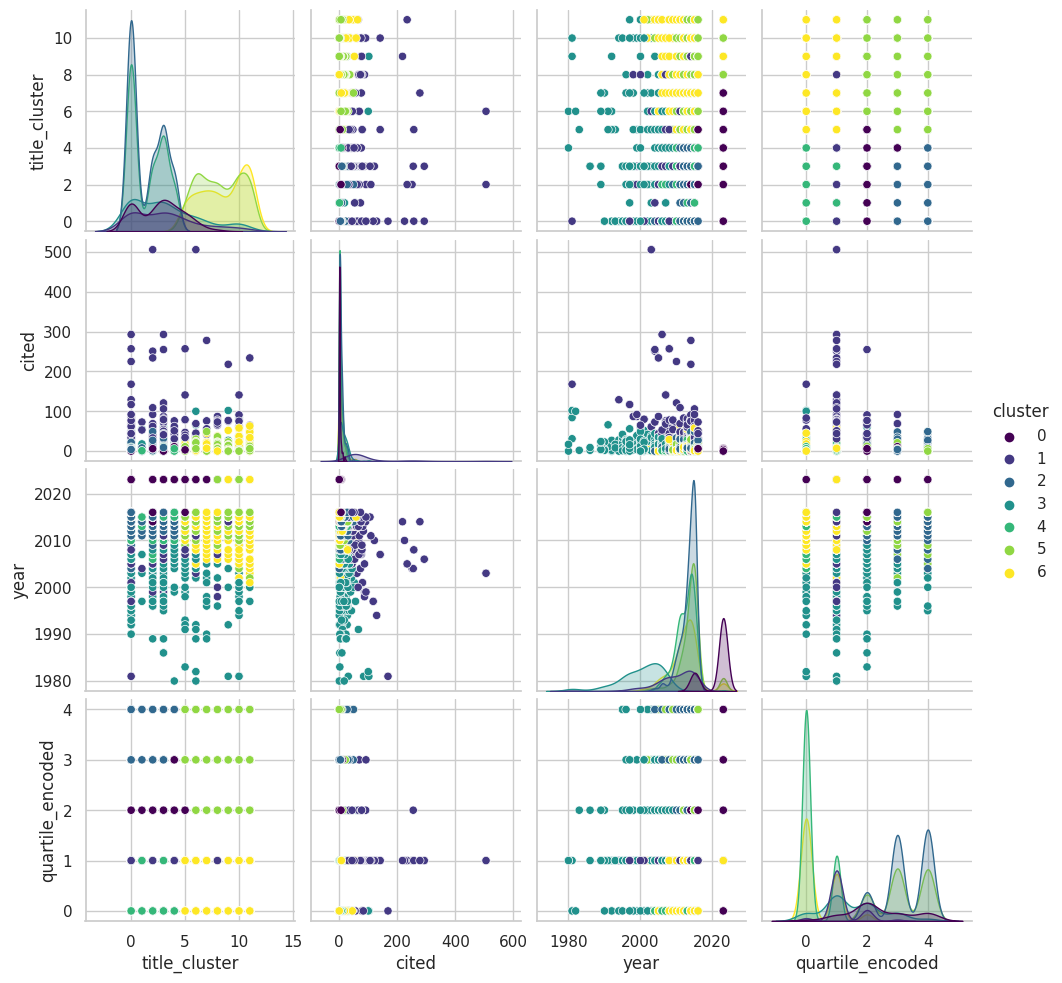

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import silhouette_score

def kmeans_clustering(tfidf_matrix, k=3, max_iters=100):
    # Pilih centroid awal secara acak
    np.random.seed(42)
    centroids = tfidf_matrix[np.random.choice(tfidf_matrix.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Hitung jarak dari masing-masing dokumen ke setiap centroid
        distances = cosine_distances(tfidf_matrix, centroids)

        # Tentukan keanggotaan cluster untuk setiap dokumen
        clusters = np.argmin(distances, axis=1)

        # Simpan posisi centroid sebelumnya
        old_centroids = centroids.copy()

        # Hitung ulang centroid berdasarkan rata-rata dokumen dalam cluster
        for i in range(k):
            cluster_docs = tfidf_matrix[clusters == i]
            if len(cluster_docs) > 0:
                centroids[i] = np.mean(cluster_docs, axis=0)

        # Cek apakah keanggotaan cluster tidak berubah
        if np.array_equal(old_centroids, centroids):
            print(f'Converged after {_ + 1} iterations.')
            break

    # Hitung Silhouette Score
    silhouette_avg = silhouette_score(tfidf_matrix, clusters)
    print("Silhouette Score:", silhouette_avg)

    return clusters, centroids

# Apply K-Means clustering
clusters,centroid = kmeans_clustering(normalized_features.values, k=7)

# Add the cluster labels to the original dataframe
df['cluster'] = clusters

# Display the head of the dataframe with the cluster labels
print(df.head())

sns.set(style='whitegrid')
pairplot = sns.pairplot(df, vars=['title_cluster', 'cited', 'year', 'quartile_encoded'], hue='cluster', palette='viridis')
plt.show()